<a href="https://colab.research.google.com/github/Aldair2003-GH/Lab06_Analisis/blob/main/Lab06_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <font color='red'> NOTE: Please do not edit this file.</font> Go to <font color='white'>*File > Save a copy in Drive*</font>.

# **Course: Sistemas Inteligentes 2025**
### **Lab05: Arboles de Decision**

---


Este es el segundo laboratorio relacionado con Regresión Logística para el curso **Sistemas Inteligentes 2025**.

En este notebook aprenderás los principios basicos de Arboles de decision para clasificacion de datos.

- Make a copy of this folder into your own machine and/or to your Google Drive.

In [1]:
!pip install seaborn scikit-learn matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_curve, roc_auc_score,
                             confusion_matrix, classification_report)

# Paso 1: Cargar el conjunto de datos

In [2]:


import pandas as pd

#Accediendo al dataset existente en github
url = 'https://raw.githubusercontent.com/Aldair2003-GH/Lab06_Analisis/refs/heads/main/diabetes.csv'

# Cargar el dataset
df = pd.read_csv(url) # Ruta relativa o completa en tu entorno

# Mostrar las primeras filas
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Paso 2: Exploración inicial de los datos

In [3]:
# Información general
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Estadísticas descriptivas
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Valores nulos
df.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
# Verificar ceros en columnas clínicas
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())


# Paso 3: Análisis de correlación

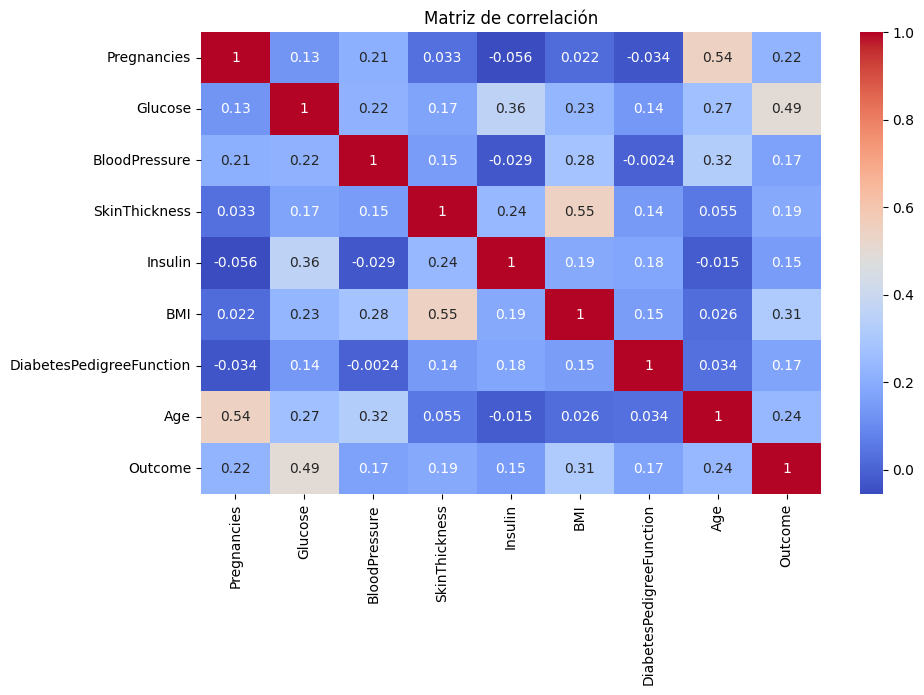

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


# Paso 4: Selección de variables y separación de datos

In [8]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


# Paso 5: Entrenamiento del modelo usando el algoritmo Random Forest

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Entrenamiento del modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = rf.predict(X_test)

# Evaluación del modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7597402597402597

Confusion Matrix:
 [[85 15]
 [22 32]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.68      0.59      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



### Interpretacion de los resulatados

1. Exactitud general del modelo (Accuracy)
Accuracy: 0.76 (aproximadamente 76%)

Esto significa que el modelo clasificó correctamente el 76% de los casos en el conjunto de prueba.

Es un resultado razonable, aunque no necesariamente óptimo en contextos donde los falsos negativos o falsos positivos son costosos (como en el diagnóstico médico).
2. Matriz de Confusión
- Verdaderos Negativos (TN) = 85 → personas sanas correctamente clasificadas como sanas.
- Falsos Positivos (FP) = 15 → personas sanas clasificadas incorrectamente como enfermas.
- Falsos Negativos (FN) = 22 → personas enfermas clasificadas incorrectamente como sanas (riesgoso).
- Verdaderos Positivos (TP) = 32 → personas enfermas correctamente clasificadas.
Conclusión crítica: Hay más falsos negativos (22) que falsos positivos (15), lo cual puede ser un problema importante si se utiliza este modelo en un entorno médico real. Un falso negativo significa no detectar a una persona con diabetes.
3. Métricas por clase
* Clase 0 (Sanos):
  - Buen desempeño, con recall alto (0.85): la mayoría de los sanos son detectados correctamente.
* Clase 1 (Diabéticos):
  - Recall más bajo (0.59): solo el 59% de los diabéticos reales son correctamente identificados.
  - La precisión (0.68) indica que de todas las personas que el modelo dice que están enfermas, el 68% realmente lo están.
  

# Paso 6: Evaluación del modelo con AUC y ROC

AUC: 0.8218


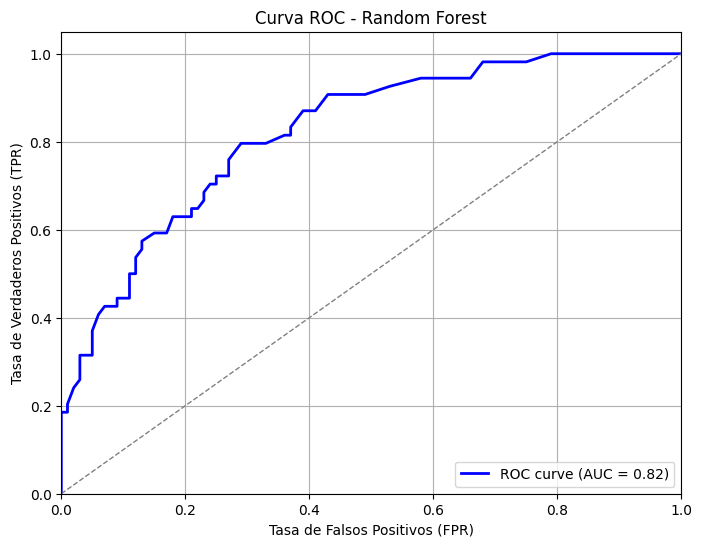

In [10]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Obtener las probabilidades de predicción para la clase positiva (1)
y_proba = rf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el AUC
roc_auc = auc(fpr, tpr)

# Imprimir AUC
print(f"AUC: {roc_auc:.4f}")

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


### Interpretacion del modelo
- ¿Qué interpreta este análisis?
  - Un AUC cercano a 1.0 indica un modelo excelente.
  - Un AUC = 0.5 significa que el modelo no es mejor que lanzar una moneda.
  - Generalmente:
    * 0.9 - 1.0: Excelente
    * 0.8 - 0.9: Muy bueno
    * 0.7 - 0.8: Aceptable
    * < 0.7: Débil

# Probando todos los modelos estudiadosm para clasificación



=== Naive Bayes ===
Accuracy: 0.6948
Confusion Matrix:
 [[74 26]
 [21 33]]
Classification Report:
              precision    recall  f1-score     support
0              0.778947  0.740000  0.758974  100.000000
1              0.559322  0.611111  0.584071   54.000000
accuracy       0.694805  0.694805  0.694805    0.694805
macro avg      0.669135  0.675556  0.671523  154.000000
weighted avg   0.701936  0.694805  0.697645  154.000000
AUC: 0.7511

=== Regresión Logística ===
Accuracy: 0.7013
Confusion Matrix:
 [[80 20]
 [26 28]]
Classification Report:
              precision    recall  f1-score     support
0              0.754717  0.800000  0.776699  100.000000
1              0.583333  0.518519  0.549020   54.000000
accuracy       0.701299  0.701299  0.701299    0.701299
macro avg      0.669025  0.659259  0.662859  154.000000
weighted avg   0.694621  0.701299  0.696863  154.000000
AUC: 0.8146

=== Árbol de Decisión ===
Accuracy: 0.6688
Confusion Matrix:
 [[79 21]
 [30 24]]
Classification R

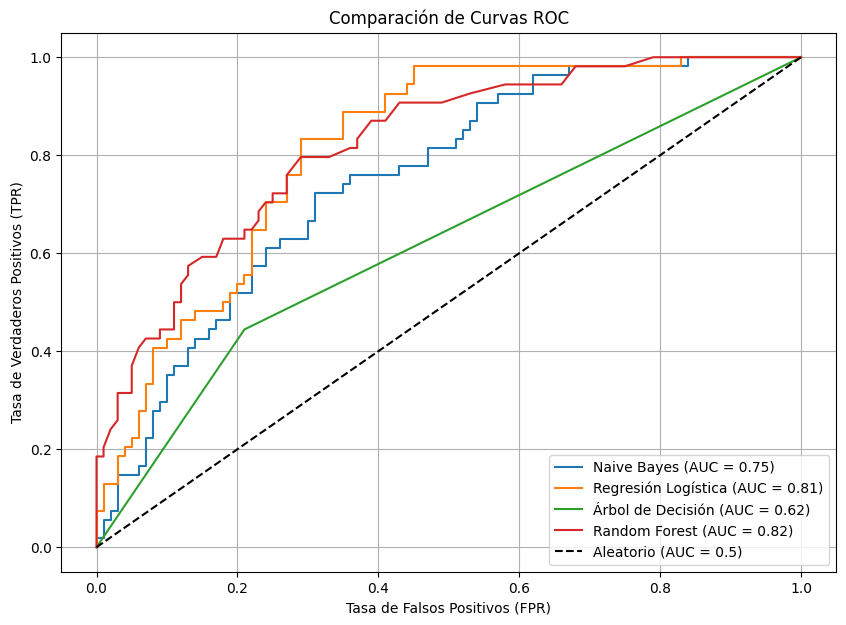

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 1. Crear modelos
models = {
    "Naive Bayes": GaussianNB(),
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 2. Entrenar y evaluar
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # probabilidades para ROC

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred, output_dict=True)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        "model": model,
        "accuracy": acc,
        "confusion_matrix": cm,
        "classification_report": cr,
        "fpr": fpr,
        "tpr": tpr,
        "auc": roc_auc
    }

# 3. Mostrar resultados
for name, res in results.items():
    print(f"\n=== {name} ===")
    print(f"Accuracy: {res['accuracy']:.4f}")
    print("Confusion Matrix:\n", res['confusion_matrix'])
    print("Classification Report:")
    print(pd.DataFrame(res['classification_report']).transpose())
    print(f"AUC: {res['auc']:.4f}")

# 4. Comparar con curva ROC
plt.figure(figsize=(10, 7))
for name, res in results.items():
    plt.plot(res['fpr'], res['tpr'], label=f"{name} (AUC = {res['auc']:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Aplicando validacion cruzada

=== Validación cruzada (F1-score) ===

Naive Bayes:
  F1-score promedio: 0.6252
  Desviación estándar: 0.0474

Regresión Logística:
  F1-score promedio: 0.6653
  Desviación estándar: 0.0173

Árbol de Decisión:
  F1-score promedio: 0.5516
  Desviación estándar: 0.0311

Random Forest:
  F1-score promedio: 0.6211
  Desviación estándar: 0.0235

=== Naive Bayes - Evaluación en Test ===
Accuracy: 0.6948
F1-score: 0.5841
AUC: 0.7511
Matriz de Confusión:
 [[74 26]
 [21 33]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.78      0.74      0.76       100
           1       0.56      0.61      0.58        54

    accuracy                           0.69       154
   macro avg       0.67      0.68      0.67       154
weighted avg       0.70      0.69      0.70       154

=== Regresión Logística - Evaluación en Test ===
Accuracy: 0.7078
F1-score: 0.5455
AUC: 0.8152
Matriz de Confusión:
 [[82 18]
 [27 27]]
Reporte de Clasificación:
             

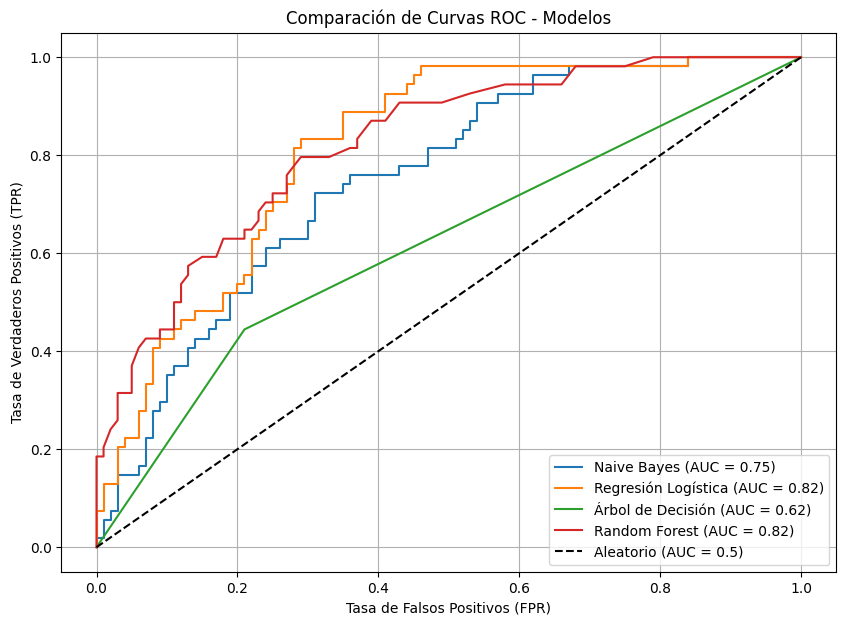

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc, f1_score, classification_report, confusion_matrix, accuracy_score

# 1. Definir modelos
models = {
    "Naive Bayes": GaussianNB(),
    "Regresión Logística": Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000))
    ]),
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# 2. Configurar validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 3. Validación cruzada (F1-score) sobre X_train, y_train
print("=== Validación cruzada (F1-score) ===\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"{name}:")
    print(f"  F1-score promedio: {scores.mean():.4f}")
    print(f"  Desviación estándar: {scores.std():.4f}\n")

# 4. Evaluación final en el conjunto de prueba (X_test, y_test) y cálculo de ROC/AUC
plt.figure(figsize=(10, 7))
for name, model in models.items():
    # Entrenar con todo el set de entrenamiento
    model.fit(X_train, y_train)

    # Probabilidades de clase positiva (para curva ROC)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        # Para pipelines, acceder al modelo final
        y_proba = model.predict_proba(X_test)[:, 1]

    # Predicción binaria
    y_pred = model.predict(X_test)

    # Métricas finales
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Mostrar métricas
    print(f"=== {name} - Evaluación en Test ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Matriz de Confusión:\n", cm)
    print("Reporte de Clasificación:\n", cr)

    # Graficar curva ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# 5. Graficar curva ROC comparativa
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC - Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Aplicando
- Selección de características usando SelectKBest + f_classif.
- Balanceo de clases con SMOTE.
- Validación cruzada (5-fold) con F1-score.
- Entrenamiento final en el conjunto balanceado.

In [13]:
pip install imbalanced-learn


=== VALIDACIÓN CRUZADA (F1-score) ===

Naive Bayes: F1-score promedio = 0.6441, std = 0.0188
Regresión Logística: F1-score promedio = 0.6714, std = 0.0225
Árbol de Decisión: F1-score promedio = 0.5534, std = 0.0383
Random Forest: F1-score promedio = 0.6730, std = 0.0249

=== Naive Bayes - Evaluación con umbral 0.35 ===
Accuracy: 0.6623
F1-score: 0.6000
AUC: 0.7559
Matriz de Confusión:
 [[63 37]
 [15 39]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71       100
           1       0.51      0.72      0.60        54

    accuracy                           0.66       154
   macro avg       0.66      0.68      0.65       154
weighted avg       0.70      0.66      0.67       154


=== Regresión Logística - Evaluación con umbral 0.35 ===
Accuracy: 0.7078
F1-score: 0.6667
AUC: 0.8035
Matriz de Confusión:
 [[64 36]
 [ 9 45]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           

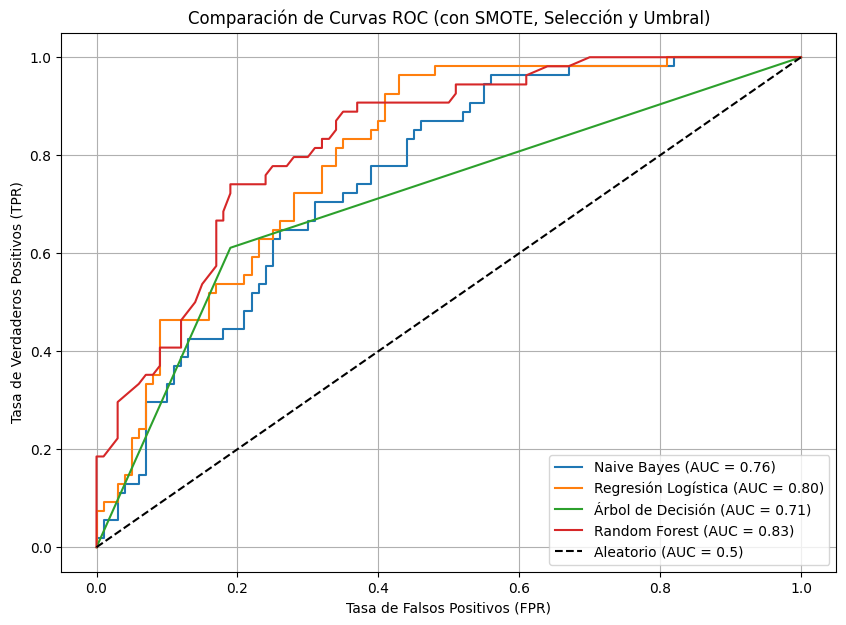

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (roc_curve, auc, f1_score, accuracy_score,
                             classification_report, confusion_matrix, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
k = 7  # Número de características seleccionadas

# 1. Definir modelos con selección de características + SMOTE ---
models = {
    "Naive Bayes": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('model', GaussianNB())
    ]),
    "Regresión Logística": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('scale', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Árbol de Decisión": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    "Random Forest": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

# 2. Validación cruzada ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("=== VALIDACIÓN CRUZADA (F1-score) ===\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"{name}: F1-score promedio = {scores.mean():.4f}, std = {scores.std():.4f}")

# 3. Entrenamiento final y evaluación con umbral personalizado ---
plt.figure(figsize=(10, 7))
custom_threshold = 0.35  # Umbral personalizado

for name, model in models.items():
    # Entrenar con todo el set de entrenamiento
    model.fit(X_train, y_train)

    # Predecir probabilidades
    y_proba = model.predict_proba(X_test)[:, 1]

    # Ajustar umbral manualmente
    y_pred_custom = (y_proba >= custom_threshold).astype(int)

    # Métricas
    acc = accuracy_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    cm = confusion_matrix(y_test, y_pred_custom)
    cr = classification_report(y_test, y_pred_custom)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Mostrar resultados
    print(f"\n=== {name} - Evaluación con umbral {custom_threshold} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Matriz de Confusión:\n", cm)
    print("Reporte de Clasificación:\n", cr)

    # ROC
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# 4. ROC Global
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC (con SMOTE, Selección y Umbral)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Con datos escalados en todos los modelos

=== VALIDACIÓN CRUZADA (F1-score) ===

Naive Bayes: F1-score promedio = 0.6441, std = 0.0188
Regresión Logística: F1-score promedio = 0.6714, std = 0.0225
Árbol de Decisión: F1-score promedio = 0.5503, std = 0.0388
Random Forest: F1-score promedio = 0.6745, std = 0.0260

=== Naive Bayes - Evaluación con umbral 0.35 ===
Accuracy: 0.6623
F1-score: 0.6000
AUC: 0.7559
Matriz de Confusión:
 [[63 37]
 [15 39]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.81      0.63      0.71       100
           1       0.51      0.72      0.60        54

    accuracy                           0.66       154
   macro avg       0.66      0.68      0.65       154
weighted avg       0.70      0.66      0.67       154


=== Regresión Logística - Evaluación con umbral 0.35 ===
Accuracy: 0.7078
F1-score: 0.6667
AUC: 0.8035
Matriz de Confusión:
 [[64 36]
 [ 9 45]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           

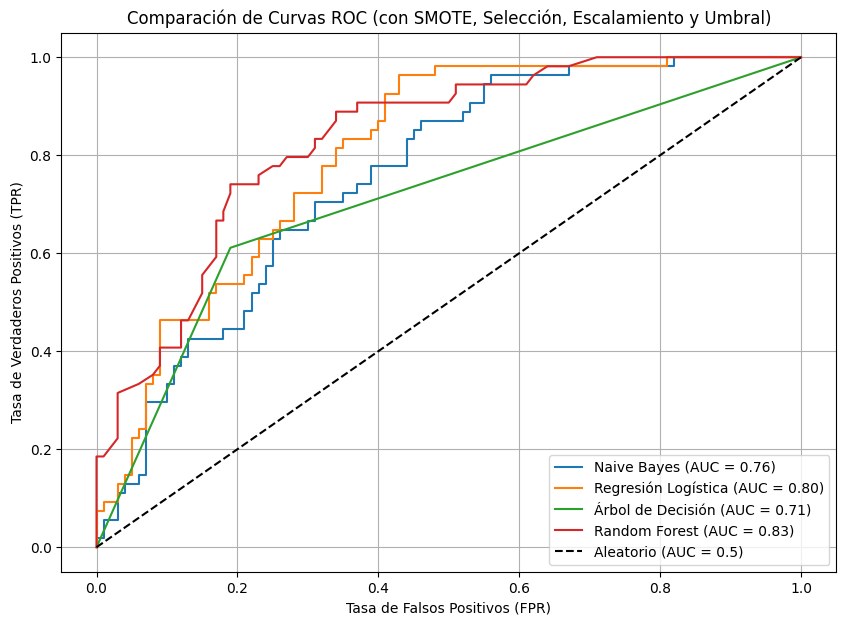

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (roc_curve, auc, f1_score, accuracy_score,
                             classification_report, confusion_matrix, precision_recall_curve)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Asumiendo que ya tienes X_train, X_test, y_train, y_test definidos

k = 7  # Número de características seleccionadas
custom_threshold = 0.35  # Umbral personalizado

# 1. Definir modelos con SelectKBest, SMOTE y StandardScaler ---
models = {
    "Naive Bayes": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('scale', StandardScaler()),
        ('model', GaussianNB())
    ]),
    "Regresión Logística": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('scale', StandardScaler()),
        ('model', LogisticRegression(max_iter=1000, random_state=42))
    ]),
    "Árbol de Decisión": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('scale', StandardScaler()),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    "Random Forest": ImbPipeline([
        ('select', SelectKBest(score_func=f_classif, k=k)),
        ('smote', SMOTE(random_state=42)),
        ('scale', StandardScaler()),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ])
}

# 2. Validación cruzada ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("=== VALIDACIÓN CRUZADA (F1-score) ===\n")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1')
    print(f"{name}: F1-score promedio = {scores.mean():.4f}, std = {scores.std():.4f}")

# 3. Entrenamiento final y evaluación con umbral personalizado ---
plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_test)[:, 1]
    y_pred_custom = (y_proba >= custom_threshold).astype(int)

    acc = accuracy_score(y_test, y_pred_custom)
    f1 = f1_score(y_test, y_pred_custom)
    cm = confusion_matrix(y_test, y_pred_custom)
    cr = classification_report(y_test, y_pred_custom)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    print(f"\n=== {name} - Evaluación con umbral {custom_threshold} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")
    print("Matriz de Confusión:\n", cm)
    print("Reporte de Clasificación:\n", cr)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

# 4. ROC Global
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio (AUC = 0.5)')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Comparación de Curvas ROC (con SMOTE, Selección, Escalamiento y Umbral)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
